# Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing

- **ID**: A unique number assigned to each observation or data sample in the dataset.

- **TV**: The amount spent on television advertising in a specific advertising period.

- **Radio**: The amount spent on radio advertising in a specific advertising period.

- **Newspaper**: The amount spent on advertising in newspapers or magazines in a specific advertising period.

- **Sales**: The quantity of products sold (sales) during a specific advertising period.

## Read and Explore Data

In [2]:
# Read advertising file
advertising = pd.read_csv("../../../../data/regression/advertising.csv")

# Convert data to DataFrame
df = pd.DataFrame(advertising)

# Rename column Unnamed: 0 to ID
df.rename(columns={"Unnamed: 0": "ID"}, inplace=True)
print("Displaying data")
print(df.head())

Displaying data
   ID     TV  Radio  Newspaper  Sales
0   1  230.1   37.8       69.2   22.1
1   2   44.5   39.3       45.1   10.4
2   3   17.2   45.9       69.3    9.3
3   4  151.5   41.3       58.5   18.5
4   5  180.8   10.8       58.4   12.9


In [3]:
# Display shape (rows, columns)
df.shape

(200, 5)

In [4]:
# Display detailed information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
# Numerical features
numerical_cols = [cname for cname in df.select_dtypes(include=np.number).columns.drop(["Sales", "ID"])]
print(numerical_cols)

# Categorical features
categorical_cols = [col for col in df.select_dtypes(exclude=np.number).columns]
print(categorical_cols)

['TV', 'Radio', 'Newspaper']
[]


In [6]:
# Check the number of unique values in each column of the advertising DataFrame
df.nunique()

ID           200
TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64

In [7]:
# Create descriptive statistics for the columns in the advertising DataFrame
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [8]:
# Calculate the correlation matrix
corr = df.drop(["ID"], axis=1).corr()
corr.shape

(4, 4)

<Axes: >

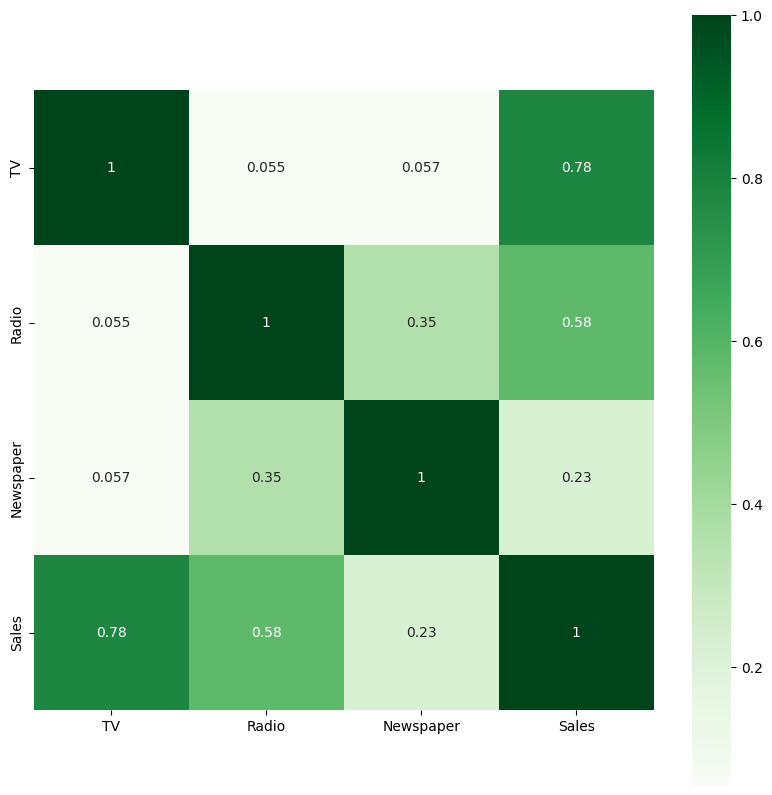

In [9]:
# Draw heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cbar=True, square=True, annot=True, annot_kws={'size': 10}, cmap='Greens')

## Handling Missing Data

### Check for missing data

In [10]:
df.isnull().sum()

ID           0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
df[df.isnull().any(axis=1)]

,ID,TV,Radio,Newspaper,Sales


- **Conclusion**: There is no missing data, so no handling is required.

## Select Features for Linear Regression

**Choose target variable as Sales**

In [12]:
target_feature = "Sales"
target_var = df[target_feature]
target_var

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

**Choose independent variables (TV, Radio, Newspaper)**

In [13]:
independent_var = df.drop(["ID", "Sales"], axis=1)
independent_var

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


**Coefficients of the linear model**

In [14]:
# Import Linear Regression library
from sklearn.linear_model import LinearRegression

# Create Linear regressor
lm = LinearRegression()

# Select features
feature_names = df.drop(["ID", "Sales"], axis=1).columns.to_list()

lm.fit(independent_var, target_var)

# Print the intercept
print(f"Intercept: {lm.intercept_}")

# Print the coefficients corresponding to each feature
for fname, coef in zip(feature_names, lm.coef_):
    print(f"Coefficient of {fname}: {coef}")

Intercept: 2.9388893694594085
Coefficient of TV: 0.0457646454553976
Coefficient of Radio: 0.18853001691820456
Coefficient of Newspaper: -0.001037493042476309


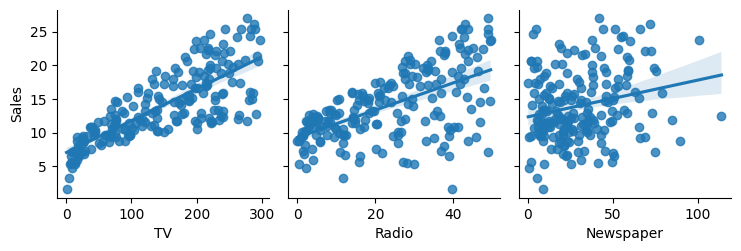

In [15]:
# Scatter plot to evaluate the linearity assumption between each independent variable (TV, Radio, Newspaper) and the target variable (Sales)
sns.pairplot(df, x_vars=feature_names, y_vars=target_feature, kind="reg");

# Split Data

In [16]:
# Split target variable and independent variable
X = independent_var
y = target_var

In [17]:
# Split into training and testing sets (7,3)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=4)

In [18]:
# Normalize data with StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(f"Training set after normalization: \n {X_train[:3, :]}")
print(f"Testing set after normalization: \n {X_test[:3, :]}")

Training set after normalization: 
 [[-0.29488317  0.40922344 -0.7502905 ]
 [-0.75904198 -1.51285017 -0.98193314]
 [-1.58254956  1.7850235   2.06648397]]
Testing set after normalization: 
 [[ 0.79007366  0.10573814 -1.22284148]
 [-0.12557462  1.29944701  0.71832382]
 [ 0.85457215  1.79176762 -1.2599043 ]]


# Build Linear Regression Model

In [19]:
# Train the model using the training set
lm.fit(X_train, y_train)

LinearRegression()

In [20]:
# Value of y intercept
lm.intercept_

np.float64(13.856428571428571)

In [21]:
# Display coefficients
for fname, coef in zip(feature_names, lm.coef_):
    print(f"Coefficient of {fname}: {coef}")

Coefficient of TV: 3.9360598123173927
Coefficient of Radio: 2.6268470990069126
Coefficient of Newspaper: 0.11954881272983513


# Model Evaluation

## Đánh giá mô hình trên tập huấn luyện

In [22]:
# Evaluate model on the training set
y_pred = lm.predict(X_train)

# Kiểm tra trên 10 instance
print('Input: ' + str(X_train[0:9]))
print('Output: ' + str(y_pred[0:9]))
print('True value: ' + str(y_train[0:9].values))

Input: [[-0.29488317  0.40922344 -0.7502905 ]
 [-0.75904198 -1.51285017 -0.98193314]
 [-1.58254956  1.7850235   2.06648397]
 [-0.23499171  0.97572935  2.26106378]
 [ 0.73133396 -0.12356188 -0.91244035]
 [ 1.34522142 -1.27680604 -0.50474931]
 [ 0.20037313  0.96898523 -1.06532449]
 [-0.82238872  1.81874409  0.70905811]
 [-1.35334955 -1.4116884   0.12068581]]
Output: [13.68102185  6.77737889 12.56344838 15.76488645 16.30134346 15.73698411
 17.06312697 15.48178708  4.83570206]
True value: [14.2  8.8  7.2 15.9 15.9 12.  18.  14.7  7.3]


In [23]:
# Model evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.8890066696510228
Adjusted R^2: 0.8865582873639131
MAE: 1.290268303086694
MSE: 3.0725524242262465
RMSE: 1.752869768187656


- R^2: A measure of the linear relationship between X and Y. It is understood as the percentage of the variance in the dependent variable that can be predicted from the independent variables.
- Adjusted R^2: Adjusted R-squared compares the explanatory power of regression models with different numbers of predictor variables.
- MAE (Mean Absolute Error): The average of the absolute values of the errors. It measures the difference between two continuous variables, here the actual value and the predicted value of y.
- MSE (Mean Squared Error): Mean squared error (MSE) is similar to MAE, but squares the errors before aggregating them instead of using the absolute value.
- RMSE (Root Mean Squared Error): Unlike MAE, RMSE is calculated based on MSE by taking the square root of MSE. RMSE indicates the average deviation between predicted values and actual values, in the same unit of measure as the original data.


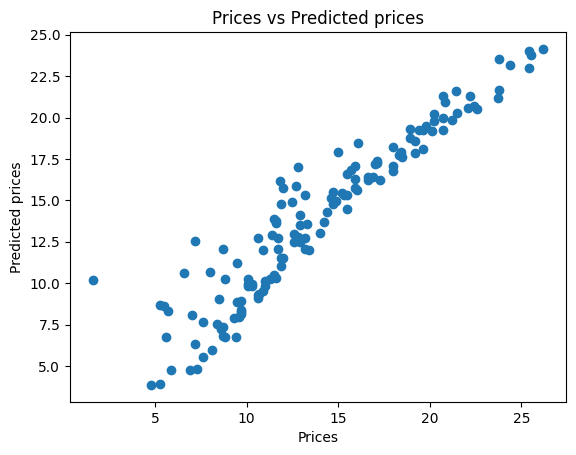

In [24]:
# Visualize the difference between actual values and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

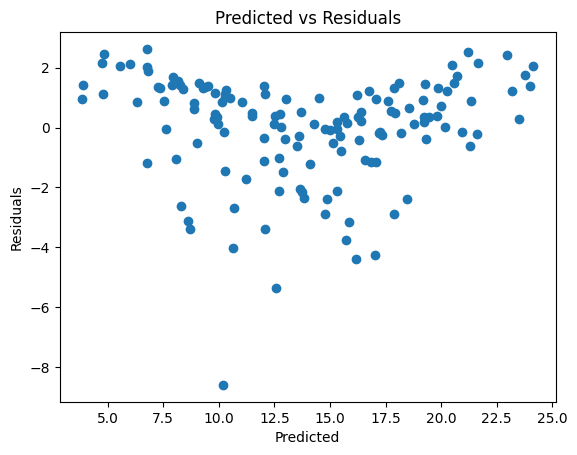

In [25]:
# Check Residuals
plt.scatter(y_pred, y_train - y_pred)
plt.title("Predicted vs Residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

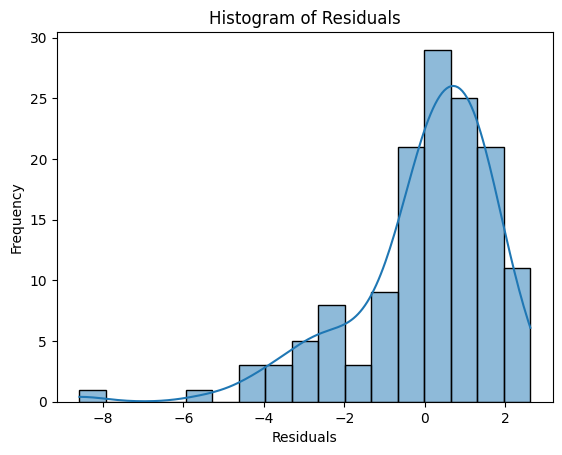

In [26]:
# Checking Normality of errors
sns.histplot(y_train - y_pred, kde=True)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

## Evaluate Data on Testing Set

In [27]:
# Predictions on the test set
y_test_pred = lm.predict(X_test)

# Check 10 instances
print('Input: ' + str(X_test[0:9]))
print('Output: ' + str(y_test_pred[0:9]))
print('True value: ' + str(y_test[0:9].values))

Input: [[ 0.79007366  0.10573814 -1.22284148]
 [-0.12557462  1.29944701  0.71832382]
 [ 0.85457215  1.79176762 -1.2599043 ]
 [ 1.50646766  1.7850235   0.52837686]
 [-1.17021989  1.13758818  0.681261  ]
 [ 1.10104855  1.04991465 -0.33333375]
 [-0.13594045 -1.18238839 -0.97730029]
 [ 0.27754097 -0.98680897  0.22260857]
 [-0.66574952  0.2068999   1.99235832]]
Output: [17.09777441 16.86148273 21.7761552  24.53812602 12.32008724 20.9083371
 10.09857022 12.38326275 12.01767713]
True value: [17.4 17.2 24.7 27.  10.4 21.8 11.2 11.7 12.9]


In [28]:
# Model evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:', 1 - (1 - metrics.r2_score(y_test, y_test_pred)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
print('MAE:', metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.9127220729596172
Adjusted R^2: 0.9080464697253109
MAE: 1.2111525124980485
MSE: 2.2237746679115578
RMSE: 1.4912326002041256
